<a href="https://colab.research.google.com/github/allansdefreitas/unsupervised-learning/blob/main/FUZZY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
#drive.mount('/content/drive/')

In [3]:
"""
I. Considere os dados "Image Segmentation" do site uci machine learning
repository (https://archive.ics.uci.edu/ml/datasets/Image+Segmentation).


"""

'\nI. Considere os dados "Image Segmentation" do site uci machine learning\nrepository (https://archive.ics.uci.edu/ml/datasets/Image+Segmentation).\n\n\n'

In [11]:
PATH = 'https://raw.githubusercontent.com/allansdefreitas/unsupervised-learning/main/segmentation.data'

In [12]:
dataset_original = pd.read_csv(PATH, sep=',').reset_index(drop=True)
dataset_original

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,140.0,125.0,9,0.000000,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,188.0,133.0,9,0.000000,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,105.0,139.0,9,0.000000,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,34.0,137.0,9,0.000000,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,39.0,111.0,9,0.000000,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,36.0,243.0,9,0.111111,0.0,1.888889,1.851851,2.000000,0.711110,13.333333,9.888889,12.111111,18.000000,-10.333333,-3.666667,14.000000,18.000000,0.452229,2.368311
206,186.0,218.0,9,0.000000,0.0,1.166667,0.744444,1.166667,0.655555,13.703704,10.666667,12.666667,17.777779,-9.111111,-3.111111,12.222222,17.777779,0.401347,2.382684
207,197.0,236.0,9,0.000000,0.0,2.444444,6.829628,3.333333,7.599998,16.074074,13.111111,16.666668,18.444445,-8.888889,1.777778,7.111111,18.555555,0.292729,2.789800
208,208.0,240.0,9,0.111111,0.0,1.055556,0.862963,2.444444,5.007407,14.148149,10.888889,13.000000,18.555555,-9.777778,-3.444444,13.222222,18.555555,0.421621,2.392487


In [13]:
PATH2 = 'https://raw.githubusercontent.com/allansdefreitas/unsupervised-learning/main/segmentation.test'

In [14]:
dataset_original2 = pd.read_csv(PATH2, sep=',').reset_index(drop=True)
dataset_original2

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,110.0,189.0,9,0.000000,0.0,1.000000,0.666667,1.222222,1.186342,12.925926,10.888889,9.222222,18.666668,-6.111111,-11.111111,17.222221,18.666668,0.508139,1.910864
1,86.0,187.0,9,0.000000,0.0,1.111111,0.720082,1.444444,0.750309,13.740741,11.666667,10.333334,19.222221,-6.222222,-10.222222,16.444445,19.222221,0.463329,1.941465
2,225.0,244.0,9,0.000000,0.0,3.388889,2.195113,3.000000,1.520234,12.259259,10.333334,9.333334,17.111110,-5.777778,-8.777778,14.555555,17.111110,0.480149,1.987902
3,47.0,232.0,9,0.000000,0.0,1.277778,1.254621,1.000000,0.894427,12.703704,11.000000,9.000000,18.111110,-5.111111,-11.111111,16.222221,18.111110,0.500966,1.875362
4,97.0,186.0,9,0.000000,0.0,1.166667,0.691215,1.166667,1.005540,15.592592,13.888889,11.777778,21.111110,-5.111111,-11.444445,16.555555,21.111110,0.442661,1.863654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,32.0,158.0,9,0.000000,0.0,0.944445,0.862963,0.833333,0.611111,7.962963,6.333334,11.888889,5.666666,-4.888889,11.777778,-6.888889,11.888889,0.520578,-1.982834
2096,8.0,162.0,9,0.111111,0.0,1.611111,2.062962,0.333333,0.133333,8.370370,6.666666,12.000000,6.444445,-5.111111,10.888889,-5.777778,12.000000,0.484805,-2.044946
2097,128.0,161.0,9,0.000000,0.0,0.555555,0.251852,0.777778,0.162963,7.148148,5.555555,10.888889,5.000000,-4.777778,11.222222,-6.444445,10.888889,0.540918,-1.996307
2098,150.0,158.0,9,0.000000,0.0,2.166667,1.633334,1.388889,0.418518,8.444445,7.000000,12.222222,6.111111,-4.333334,11.333333,-7.000000,12.222222,0.503086,-1.943449


In [15]:
frames = [dataset_original, dataset_original2]

dataset_original = pd.concat(frames)
dataset_original

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,140.0,125.0,9,0.000000,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,188.0,133.0,9,0.000000,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,105.0,139.0,9,0.000000,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,34.0,137.0,9,0.000000,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,39.0,111.0,9,0.000000,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,32.0,158.0,9,0.000000,0.0,0.944445,0.862963,0.833333,0.611111,7.962963,6.333334,11.888889,5.666666,-4.888889,11.777778,-6.888889,11.888889,0.520578,-1.982834
2096,8.0,162.0,9,0.111111,0.0,1.611111,2.062962,0.333333,0.133333,8.370370,6.666666,12.000000,6.444445,-5.111111,10.888889,-5.777778,12.000000,0.484805,-2.044946
2097,128.0,161.0,9,0.000000,0.0,0.555555,0.251852,0.777778,0.162963,7.148148,5.555555,10.888889,5.000000,-4.777778,11.222222,-6.444445,10.888889,0.540918,-1.996307
2098,150.0,158.0,9,0.000000,0.0,2.166667,1.633334,1.388889,0.418518,8.444445,7.000000,12.222222,6.111111,-4.333334,11.333333,-7.000000,12.222222,0.503086,-1.943449


In [16]:
"""
Considere 3 datasets: 

o primeiro considerando as variáveis 4 a 9 (shape)

"""

dataset_1_shape = dataset_original.iloc[:,3:9]
dataset_1_shape

,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD
0,0.000000,0.0,0.277778,0.062963,0.666667,0.311111
1,0.000000,0.0,0.333333,0.266667,0.500000,0.077778
2,0.000000,0.0,0.277778,0.107407,0.833333,0.522222
3,0.000000,0.0,0.500000,0.166667,1.111111,0.474074
4,0.000000,0.0,0.722222,0.374074,0.888889,0.429629
...,...,...,...,...,...,...
2095,0.000000,0.0,0.944445,0.862963,0.833333,0.611111
2096,0.111111,0.0,1.611111,2.062962,0.333333,0.133333
2097,0.000000,0.0,0.555555,0.251852,0.777778,0.162963
2098,0.000000,0.0,2.166667,1.633334,1.388889,0.418518


In [17]:
"""

o segundo considerando as variaveis 10 a 19 (rgb), 

"""

dataset_2_rgb = dataset_original.iloc[:,9:19]
dataset_2_rgb

,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773
...,...,...,...,...,...,...,...,...,...,...
2095,7.962963,6.333334,11.888889,5.666666,-4.888889,11.777778,-6.888889,11.888889,0.520578,-1.982834
2096,8.370370,6.666666,12.000000,6.444445,-5.111111,10.888889,-5.777778,12.000000,0.484805,-2.044946
2097,7.148148,5.555555,10.888889,5.000000,-4.777778,11.222222,-6.444445,10.888889,0.540918,-1.996307
2098,8.444445,7.000000,12.222222,6.111111,-4.333334,11.333333,-7.000000,12.222222,0.503086,-1.943449


In [18]:
"""
o terceiro considerando as variaveis 4 a 19 (shape + rgb)

"""

dataset_shape_rgb = dataset_original.iloc[:,3:19]
dataset_shape_rgb

,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,0.000000,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,0.000000,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,0.000000,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,0.000000,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,0.000000,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,0.000000,0.0,0.944445,0.862963,0.833333,0.611111,7.962963,6.333334,11.888889,5.666666,-4.888889,11.777778,-6.888889,11.888889,0.520578,-1.982834
2096,0.111111,0.0,1.611111,2.062962,0.333333,0.133333,8.370370,6.666666,12.000000,6.444445,-5.111111,10.888889,-5.777778,12.000000,0.484805,-2.044946
2097,0.000000,0.0,0.555555,0.251852,0.777778,0.162963,7.148148,5.555555,10.888889,5.000000,-4.777778,11.222222,-6.444445,10.888889,0.540918,-1.996307
2098,0.000000,0.0,2.166667,1.633334,1.388889,0.418518,8.444445,7.000000,12.222222,6.111111,-4.333334,11.333333,-7.000000,12.222222,0.503086,-1.943449


In [19]:
"""
Em cada dataset execute o algoritmo FCM com a distância de City-Block
50 vezes para obter uma partição fuzzy em 7 grupos e selecione o melhor
resultado segundo a função objetivo.


#PARA dataset_1_shape (features 4 a 9)

"""

'\nEm cada dataset execute o algoritmo FCM com a distância de City-Block\n50 vezes para obter uma partição fuzzy em 7 grupos e selecione o melhor\nresultado segundo a função objetivo.\n\n\n#PARA dataset_1_shape (features 4 a 9)\n\n'

In [20]:
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 14.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894073 sha256=e07491e62409a7fc912c51fb52499796467f8ede9d5bfb51011fbade605707ad
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy
from sklearn.preprocessing import StandardScaler

In [22]:
X_dataset_1_shape = dataset_1_shape.values

X_dataset_1_shape, X_dataset_1_shape.shape

(array([[0.        , 0.        , 0.2777779 , 0.06296301, 0.66666675,
         0.31111118],
        [0.        , 0.        , 0.33333334, 0.26666674, 0.5       ,
         0.07777774],
        [0.        , 0.        , 0.27777782, 0.10740744, 0.83333325,
         0.52222216],
        ...,
        [0.        , 0.        , 0.55555534, 0.25185192, 0.77777785,
         0.16296278],
        [0.        , 0.        , 2.166667  , 1.6333338 , 1.388889  ,
         0.41851807],
        [0.11111111, 0.        , 1.3888888 , 1.1296295 , 2.        ,
         0.8888891 ]]),
 (2310, 6))

In [23]:
scaler = StandardScaler()
X_dataset_1_shape = scaler.fit_transform(X_dataset_1_shape)
X_dataset_1_shape

array([[-0.35704732, -0.1945517 , -0.59895018, -0.12593146, -0.48709045,
        -0.13491062],
       [-0.35704732, -0.1945517 , -0.57836131, -0.12138822, -0.53326745,
        -0.13887896],
       [-0.35704732, -0.1945517 , -0.59895021, -0.12494021, -0.44091352,
        -0.13132023],
       ...,
       [-0.35704732, -0.1945517 , -0.49600574, -0.12171864, -0.4563058 ,
        -0.13743021],
       [-0.35704732, -0.1945517 ,  0.10107298, -0.09090727, -0.28699021,
        -0.13308394],
       [ 2.41066847, -0.1945517 , -0.18717198, -0.10214145, -0.11767466,
        -0.12508427]])

In [24]:
R_dataset_1_shape = skfuzzy.cmeans(data = X_dataset_1_shape.T, c = 7, m = 2, error=0.005, maxiter= 1000, init=None)
R_dataset_1_shape

(array([[-3.49330513e-01, -1.85894738e-01,  1.60403856e-01,
         -6.36845824e-02,  1.07112057e-01, -7.96640830e-02],
        [-3.54665233e-01, -1.91993241e-01, -4.05688332e-01,
         -1.12771018e-01, -4.11128153e-01, -1.26745939e-01],
        [-2.95704760e-01, -9.25970984e-02,  1.90769745e+00,
          2.00919239e-01,  1.26956958e-01,  1.66660179e-02],
        [-2.56789647e-01,  4.46733768e+00,  4.53981579e-01,
          5.01996565e-02,  6.32361719e-01,  3.13970060e-02],
        [-3.08480411e-01, -9.68006363e-02,  3.35078201e-01,
          9.74485093e-02,  2.64680580e+00,  9.65872051e-01],
        [-3.55112914e-01,  4.23747600e+00,  7.82869587e+00,
          1.31623814e+01,  1.02825869e+01,  2.04289775e+01],
        [ 2.44642689e+00, -1.82293623e-01, -7.36136390e-02,
         -8.14081734e-02, -9.25389417e-02, -1.00587354e-01]]),
 array([[4.35411962e-02, 4.38796558e-02, 4.10707037e-02, ...,
         1.35338499e-02, 5.93127676e-01, 2.03726948e-03],
        [9.40400158e-01, 9.3953

In [25]:
type(R_dataset_1_shape)

tuple

In [26]:
#matrix of probabilities
U = R_dataset_1_shape[1]
U

array([[4.35411962e-02, 4.38796558e-02, 4.10707037e-02, ...,
        1.35338499e-02, 5.93127676e-01, 2.03726948e-03],
       [9.40400158e-01, 9.39534715e-01, 9.44496765e-01, ...,
        9.82261328e-01, 3.53522332e-01, 2.04027840e-03],
       [5.99437016e-03, 6.25108088e-03, 5.37732586e-03, ...,
        1.63261179e-03, 2.71078638e-02, 1.33462572e-03],
       ...,
       [3.40826004e-03, 3.45521287e-03, 3.10892559e-03, ...,
        8.81255725e-04, 9.72292614e-03, 9.59336217e-04],
       [5.05981338e-05, 5.23657655e-05, 4.50793701e-05, ...,
        1.27161530e-05, 1.22127397e-04, 1.98909230e-05],
       [4.91745795e-03, 5.08303945e-03, 4.39310862e-03, ...,
        1.25042149e-03, 1.21605859e-02, 9.93077110e-01]])

In [27]:
U.shape

(7, 2310)

In [28]:
U[6][0]

0.004917457951128116

In [29]:
sum = 0
for i in range(7):
  sum +=  U[i][0]

print(sum)

0.9999999999999997


In [30]:
#to which group each i-th element belongs
predictions = U.argmax(0)
predictions

array([1, 1, 1, ..., 1, 0, 6])

In [31]:
type(X_dataset_1_shape), X_dataset_1_shape.shape

(numpy.ndarray, (2310, 6))

In [32]:
X_dataset_1_shape

array([[-0.35704732, -0.1945517 , -0.59895018, -0.12593146, -0.48709045,
        -0.13491062],
       [-0.35704732, -0.1945517 , -0.57836131, -0.12138822, -0.53326745,
        -0.13887896],
       [-0.35704732, -0.1945517 , -0.59895021, -0.12494021, -0.44091352,
        -0.13132023],
       ...,
       [-0.35704732, -0.1945517 , -0.49600574, -0.12171864, -0.4563058 ,
        -0.13743021],
       [-0.35704732, -0.1945517 ,  0.10107298, -0.09090727, -0.28699021,
        -0.13308394],
       [ 2.41066847, -0.1945517 , -0.18717198, -0.10214145, -0.11767466,
        -0.12508427]])

In [33]:
X = X_dataset_1_shape
preds = predictions

0
1
2
3
4
5
6


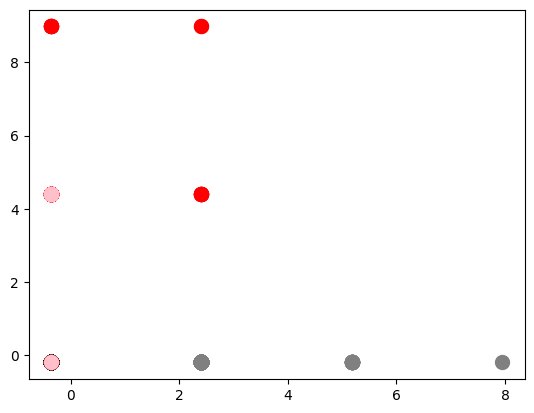

In [34]:
#let's see
colors = ['blue', 'orange', 'green', 'red', 'brown', 'pink', 'gray']
for i in range(7):
  print(i)
  plt.scatter(X[preds == i, 0], X[preds == i, 1], s=100, c = colors[i], label='Cluster ' + str(i + 1))

In [35]:
R_dataset_1_shape = np.asarray(R_dataset_1_shape)
R_dataset_1_shape.shape, type(R_dataset_1_shape)

<ipython-input-35-d831f6b5820c>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  R_dataset_1_shape = np.asarray(R_dataset_1_shape)


((7,), numpy.ndarray)

In [36]:
R_dataset_1_shape[0][6][0]

2.4464268932224957

In [37]:
sum = 0
for i in range(5):
  sum = R_dataset_1_shape[0][i][0]

print(sum)

-0.30848041137988574


In [43]:
import numpy as np


def initialize_membership_matrix(n_samples, n_clusters):
    """
    Initializes the membership matrix for Fuzzy C-Means.

    Parameters:
        n_samples (int): Number of data points.
        n_clusters (int): Number of clusters.

    Returns:
        numpy.ndarray: Initial membership matrix.
    """
    membership_matrix = np.random.rand(n_samples, n_clusters)
    membership_matrix /= np.sum(membership_matrix, axis=1, keepdims=True)
    return membership_matrix


def update_membership_matrix(data, centroids, m, distance_metric):
    """
    Updates the membership matrix for Fuzzy C-Means.

    Parameters:
        data (numpy.ndarray): Input data points.
        centroids (numpy.ndarray): Current centroid positions.
        m (float): Fuzziness parameter.
        distance_metric (str): Distance metric to use ('cityblock' or 'euclidean').

    Returns:
        numpy.ndarray: Updated membership matrix.
    """
    n_samples, n_clusters = data.shape[0], centroids.shape[0]
    membership_matrix = np.zeros((n_samples, n_clusters))

    for i in range(n_samples):
        for j in range(n_clusters):
            if distance_metric == 'cityblock':
                dist = np.sum(np.abs(data[i] - centroids[j]))
            elif distance_metric == 'euclidean':
                dist = np.linalg.norm(data[i] - centroids[j])
            else:
                raise ValueError("Invalid distance metric.")

            membership_matrix[i, j] = 1 / np.sum((dist / np.abs(data[i] - centroids)) ** (2 / (m - 1)))

    membership_matrix /= np.sum(membership_matrix, axis=1, keepdims=True)
    return membership_matrix


def update_centroids(data, membership_matrix, m):
    """
    Updates the centroids for Fuzzy C-Means.

    Parameters:
        data (numpy.ndarray): Input data points.
        membership_matrix (numpy.ndarray): Current membership matrix.
        m (float): Fuzziness parameter.

    Returns:
        numpy.ndarray: Updated centroid positions.
    """
    n_clusters, n_features = membership_matrix.shape[1], data.shape[1]
    centroids = np.zeros((n_clusters, n_features))

    for j in range(n_clusters):
        membership_power = membership_matrix[:, j] ** m
        centroids[j] = np.sum(membership_power.reshape(-1, 1) * data, axis=0) / np.sum(membership_power)

    return centroids


def fuzzy_cmeans(data, n_clusters, m, distance_metric='cityblock', max_iter=100, tolerance=1e-4):
    """
    Fuzzy C-Means clustering algorithm.

    Parameters:
        data (numpy.ndarray): Input data points.
        n_clusters (int): Number of clusters.
        m (float): Fuzziness parameter (> 1).
        distance_metric (str): Distance metric to use ('cityblock' or 'euclidean').
        max_iter (int): Maximum number of iterations.
        tolerance (float): Convergence tolerance.

    Returns:
        numpy.ndarray: Final centroid positions.
        numpy.ndarray: Membership matrix.
        int: Number of iterations performed.
    """
    n_samples, n_features = data.shape
    membership_matrix = initialize_membership_matrix(n_samples, n_clusters)
    centroids = np.zeros((n_clusters, n_features))

    for iteration in range(max_iter):
        prev_centroids = centroids.copy()

        centroids = update_centroids(data, membership_matrix, m)
        membership_matrix = update_membership_matrix(data, centroids, m, distance_metric)

        if np.linalg.norm(centroids - prev_centroids) < tolerance:
            break

    return centroids, membership_matrix, iteration+1


def calculate_objective(data, centroids, membership_matrix, m, distance_metric):
    """
    Calculates the objective function value for Fuzzy C-Means.

    Parameters:
        data (numpy.ndarray): Input data points.
        centroids (numpy.ndarray): Current centroid positions.
        membership_matrix (numpy.ndarray): Current membership matrix.
        m (float): Fuzziness parameter.
        distance_metric (str): Distance metric to use ('cityblock' or 'euclidean').

    Returns:
        float: Objective function value.
    """
    objective = 0
    n_samples, n_clusters = data.shape[0], centroids.shape[0]

    for i in range(n_samples):
        for j in range(n_clusters):
            if distance_metric == 'cityblock':
                dist = np.sum(np.abs(data[i] - centroids[j]))
            elif distance_metric == 'euclidean':
                dist = np.linalg.norm(data[i] - centroids[j])
            else:
                raise ValueError("Invalid distance metric.")

            objective += (membership_matrix[i, j] ** m) * (dist ** 2)

    return objective




#mpc e partition entropy

#close to 1 values are better
def calculate_mpc(membership_matrix):
    """
    Calculates the Modified Partition Coefficient (MPC) for Fuzzy C-Means clustering.

    Parameters:
        membership_matrix (numpy.ndarray): Membership matrix of shape (n_samples, n_clusters).

    Returns:
        float: Modified Partition Coefficient value.
    """
    max_memberships = np.max(membership_matrix, axis=1)
    sum_memberships = np.sum(membership_matrix, axis=1)

    mpc = np.mean(max_memberships / sum_memberships)

    return mpc



#close to 0 values are better
def calculate_partition_entropy(membership_matrix):
    """
    Calculates the Partition Entropy for Fuzzy C-Means clustering.

    Parameters:
        membership_matrix (numpy.ndarray): Membership matrix of shape (n_samples, n_clusters).

    Returns:
        float: Partition Entropy value.
    """
    n_samples, n_clusters = membership_matrix.shape
    entropy = 0.0

    for i in range(n_samples):
        for j in range(n_clusters):
            if membership_matrix[i, j] > 0:
                entropy -= membership_matrix[i, j] * np.log2(membership_matrix[i, j])

    partition_entropy = entropy / n_samples

    return partition_entropy


In [39]:
X_dataset_1_shape

array([[-0.35704732, -0.1945517 , -0.59895018, -0.12593146, -0.48709045,
        -0.13491062],
       [-0.35704732, -0.1945517 , -0.57836131, -0.12138822, -0.53326745,
        -0.13887896],
       [-0.35704732, -0.1945517 , -0.59895021, -0.12494021, -0.44091352,
        -0.13132023],
       ...,
       [-0.35704732, -0.1945517 , -0.49600574, -0.12171864, -0.4563058 ,
        -0.13743021],
       [-0.35704732, -0.1945517 ,  0.10107298, -0.09090727, -0.28699021,
        -0.13308394],
       [ 2.41066847, -0.1945517 , -0.18717198, -0.10214145, -0.11767466,
        -0.12508427]])

In [ ]:
# Example usage

#data = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]])
data = X_dataset_1_shape
n_clusters = 7
m = 2
distance_metric = 'cityblock'

centroids, membership_matrix, iterations = fuzzy_cmeans(data, n_clusters, m, distance_metric)
print("Centroids:")
print(centroids)
print("Membership matrix:")
print(membership_matrix)
print("Iterations:", iterations)

In [ ]:
membership_matrix.shape

(210, 7)

In [41]:
sum = 0
for i in range(7):
  sum += membership_matrix[0][i]

print(sum)

1.0


In [ ]:
data = X_dataset_1_shape
n_clusters = 7
m = 2
distance_metric = 'cityblock'
objective_value = 0

for i in range(50):
  # Example usage

  centroids, membership_matrix, iterations = fuzzy_cmeans(data, n_clusters, m, distance_metric)
  objective_value = calculate_objective(data, centroids, membership_matrix, m, distance_metric)
  calculate_partition_entropy(membership_matrix)

  print("Centroids:")
  print(centroids)
  print("Membership matrix:")
  print(membership_matrix)
  print("Objective value:", objective_value)
  print("Iterations:", iterations)

In [51]:
data = X_dataset_1_shape
n_clusters = 7
m = 2
distance_metric = 'cityblock'
best_objective_value = 99999999999.9
best_results = 0


for i in range(50):

  # Example usage
  print("FCM: ", i + 1)

  centroids, membership_matrix, iterations = fuzzy_cmeans(data, n_clusters, m, distance_metric)
  objective_value = calculate_objective(data, centroids, membership_matrix, m, distance_metric)
  
  
  if(objective_value < best_objective_value):
    best_objective_value = objective_value
    best_results = centroids, membership_matrix, iterations

    #print("Centroids:")
    #print(centroids)
    #print("Membership matrix:")
    #print(membership_matrix)
    print("Objective value:", objective_value)
    print("Iterations:", iterations, "\n")
    
#Objective value: 3138.9396801726393

FCM:  1
Objective value: 3355.069738239495
Iterations: 100 



Para cada dataset e partição fuzzy, calcule o Modified partition coefficient
e o Partition entropy. Comente.

In [57]:
best_centroids, best_membership_matrix, iterations = best_results

In [59]:
calculate_mpc(best_membership_matrix)

0.8668297096246083

In [62]:
calculate_partition_entropy(best_membership_matrix)

0.6009402898603635

Para cada dataset e partição fuzzy, produza uma partição crisp em 7
grupos e calcule o índice de Rand corrigido, e a F-measure (adaptada
para agrupamento). Comente.

In [64]:

def fuzzy_to_crisp_partition(membership_matrix):
    """
    Converts a fuzzy partition into a crisp partition.

    Parameters:
        membership_matrix (numpy.ndarray): Membership matrix of shape (n_samples, n_clusters).

    Returns:
        numpy.ndarray: Crisp partition of shape (n_samples,).
    """
    crisp_partition = np.argmax(membership_matrix, axis=1)

    return crisp_partition


crisp_partition = fuzzy_to_crisp_partition(best_membership_matrix)
crisp_partition

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
for i in range(len(crisp_partition)):
  print(crisp_partition[i])

In [ ]:
"""
O índice de rand corrigido é um índice externo de classificação, que toma como critério de cálculo o quantitativo de elementos pertencentes a cada 
cluster e a cada classe, ou seja, os rótulos de classe e de grupo. O índice está definido no intervalo [-1,1], onde valores próximos a 1 indicam uma 
grande similaridade entre os clusters gerados e as rotulações de classe, ao passo em que valores negativos, ou mesmo próximos a 0, apontam para um 
grau relativamente elevado de aleatoriedade nos clusters gerados


O índice de Rand corrigido [Costa et al. 2003] possui seus valores corrigidos de
acordo com acertos nas comparac¸oes entre as partic¸ ˜ oes.O ˜ ´ındice de Rand corrigido pode
assumir valores em [-1,1], onde o valor 1 indica uma coesao perfeita entre as partic¸ ˜ oes, ˜
enquanto valores proximos de 0 (ou negativos) correspondem a uma coes ´ ao encontrada ˜
por acaso.
(NebFuzz: Um Novo Algoritmo de Agrupamento
Semi-Supervisionado Baseado no Fuzzy C-Means)

The Adjusted Rand Index (ARI) is a measure used to evaluate the similarity between two data clusterings, taking into account both 
the agreement on the assignments and the random chance. It is an extension of the Rand Index, which measures the similarity based 
on the number of pairs of data points that are either assigned to the same cluster or different clusters in both clusterings.

The ARI adjusts the Rand Index to account for the expected similarity due to random chance. It considers the distribution of 
cluster assignments in both clusterings and compares it with what would be expected by chance. The ARI value ranges from -1 to 1, 
where 1 indicates a perfect match between the clusterings, 0 indicates the expected similarity by chance, and -1 indicates 
a complete mismatch between the clusterings.
"""

In [ ]:
#o índice de Rand corrigido

In [ ]:
from sklearn.metrics import adjusted_rand_score

# Example clusterings
clustering1 = [0, 0, 1, 1, 2, 2]
clustering2 = [1, 1, 0, 0, 2, 2]

# Calculate ARI
ari = adjusted_rand_score(clustering1, clustering2)

print("Adjusted Rand Index:", ari)


In [72]:
#F-measure (adaptada para agrupamento)

In [ ]:
from sklearn import metrics

# Example clusterings
clustering1 = [0, 0, 1, 1, 2, 2]
clustering2 = [1, 1, 0, 0, 2, 2]

# Calculate F-measure
f_measure = metrics.fowlkes_mallows_score(clustering1, clustering2)

print("F-measure:", f_measure)


In [ ]:
#It aparently is working

In [ ]:
print()